In [117]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
%matplotlib inline

import time
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math

from gym.envs.toy_text.frozen_lake import LEFT, RIGHT, DOWN, UP
from gym.envs.toy_text import frozen_lake #

import gym
from gym.envs.registration import register

register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False})


""" 
    env: gym.core.Environment
    Environment to play on.

    env.P: dictionary
    It is from gym.core.Environment
    P[state][action] is tuples with (probability, nextstate, reward, terminal)
    
    env.nS: int
    count of states 
    
    env.nA: int
    count of actions available
    
    action_space: discrete
                LEFT = 0
                DOWN = 1
                RIGHT = 2
                UP = 3
    ENVIRONMENT: 
                "SFFF",
                "FHFH",
                "FFFH",
                "HFFG"
"""

def print_policy(policy, action_names):
    """ 
    Print the policy in human-readable format.
    """
    str_policy = policy.astype('str')
    for action_num, action_name in action_names.items():
        np.place(str_policy, policy == action_num, action_name)

    print(str_policy[0:4])
    print(str_policy[4:8])
    print(str_policy[8:12])
    print(str_policy[12:16])
    
    return str_policy

action_names = {LEFT: 'LEFT', RIGHT: 'RIGHT', DOWN: 'DOWN', UP: 'UP'}

C:\Users\Amulya Cherian\anaconda3\lib\site-packages\gym\envs\registration.py:498: UserWarning: WARN: Overriding environment D4x4-FrozenLake-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [2]:
import gym
from gym.spaces import Discrete


In [118]:
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv


In [119]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
%matplotlib inline

import time
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math
import torch


from gym.envs.toy_text.frozen_lake import LEFT, RIGHT, DOWN, UP
from gym.envs.toy_text import frozen_lake 

import gym
from gym.envs.registration import register

register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})


""" 
    env: gym.core.Environment
    Environment to play on.

    env.P: dictionary
    It is from gym.core.Environment
    P[state][action] is tuples with (probability, nextstate, reward, terminal)
    
    env.nS: int
    count of states 
    
    env.nA: int
    count of actions available
    
    action_space: discrete
                LEFT = 0
                DOWN = 1
                RIGHT = 2
                UP = 3
    ENVIRONMENT: 
                "SFFF",
                "FHFH",
                "FFFH",
                "HFFG"
"""

def print_policy(policy, action_names):
    """ 
    Print the policy in human-readable format.
    """
    str_policy = policy.astype('str')
    for action_num, action_name in action_names.items():
        np.place(str_policy, policy == action_num, action_name)

    print(str_policy[0:4])
    print(str_policy[4:8])
    print(str_policy[8:12])
    print(str_policy[12:16])
    
    return str_policy

action_names = {LEFT: 'LEFT', RIGHT: 'RIGHT', DOWN: 'DOWN', UP: 'UP'}

In [19]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [150]:
env = gym.make('D4x4-FrozenLake-v0')
grid = 4
gamma = 0.9 # Change this to play with it


Doing Value Iteration
Total time taken: 0.060307979583740234
Value function: [0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729
 0.81    0.9     0.      0.      0.9     1.      0.     ]
Total Value Iteration Steps: 5
Policy:
['DOWN' 'RIGHT' 'DOWN' 'LEFT']
['DOWN' 'LEFT' 'DOWN' 'LEFT']
['RIGHT' 'DOWN' 'DOWN' 'LEFT']
['LEFT' 'RIGHT' 'RIGHT' 'LEFT']


Text(0.5, 1.0, 'Heatmap of policy iteration with value function values and directions')

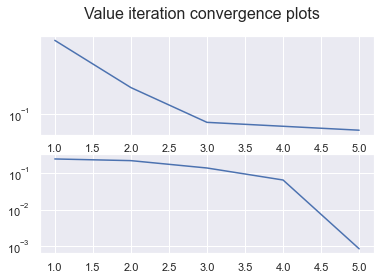

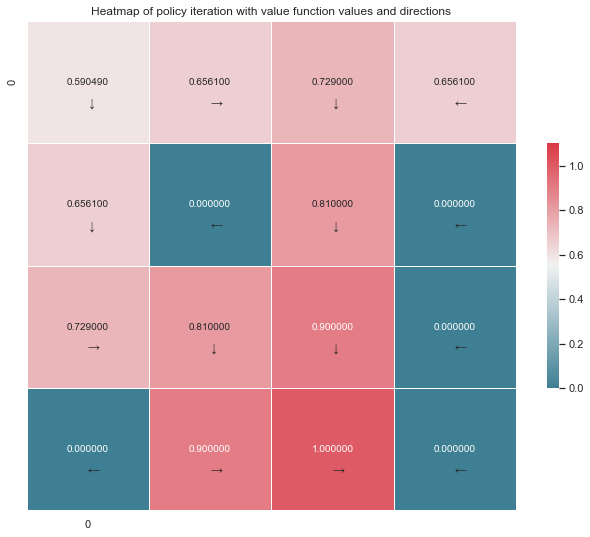

In [151]:
def value_iteration(env, gamma, max_iterations=int(1e3), tol=1e-3):
    """
    Runs value iteration for a given gamma and environment. Return 
    the value function and the number of iterations it took to converge.
        See section 4.4 of Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) by Sutton and Barto
    """
    value_func_old = np.random.rand(env.observation_space.n)
    value_func_new = np.zeros(env.observation_space.n)
    value_func_collect = np.zeros((env.observation_space.n,max_iterations))
    delta_collect = np.zeros(max_iterations)

    for iteration in range(max_iterations):
        delta=0
        for s in range(env.observation_space.n):
            max_value_func = -1
            
            # Refer Figure 4.5 for the algorithm
            # Parse through env.nA for finding the maximum
            # Using env.P[s][a] implement the V(s) updation
            for a in range(env.action_space.n):
                value_func_temp=0
                for next_state_from_tpm in env.P[s][a]: 
                    prob_action = next_state_from_tpm[0]
                    cur_reward=next_state_from_tpm[2]
                    if next_state_from_tpm[3]:
                        future_reward=0
                    else: future_reward=gamma*value_func_old[next_state_from_tpm[1]]
                    value_func_temp+=prob_action * (cur_reward + future_reward)
                if value_func_temp>max_value_func:
                    max_value_func=value_func_temp
                    
            diff=abs(value_func_old[s]-max_value_func)
            delta=max(delta,diff)
            value_func_new[s]=max_value_func

        delta_collect[iteration] = delta
        value_func_old = value_func_new
        value_func_collect[:,iteration] = value_func_old
        # Stopping criteria: STOP when the sup norm of (V_k-V_{k-1}) is less than some tolerance level(it's 1e-3 here).
        if delta<=tol: break
    temp=np.repeat(value_func_collect[:,iteration], iteration, axis=0)
    temp=temp.reshape(16,iteration)
    temp1 = abs(value_func_collect[:,0:iteration]-temp);
    distance_from_converged_value_func = temp1.max(axis=0)

    fig = plt.figure()
    fig.suptitle("Value iteration convergence plots", fontsize=16)
    ax = plt.subplot(2,1,1)
    ax.plot(range(1,iteration+1),delta_collect[0:iteration])
    #ax.set_title('||V_k-V_{k-1}|| plot')
    ax.set_yscale('log')


    ax = plt.subplot(2,1,2)
    ax.plot(range(1,iteration+1),distance_from_converged_value_func)
    #ax.set_title('||V_k-V^*|| plot')
    ax.set_yscale('log')

    return value_func_new, iteration


def value_function_to_policy(env, gamma, value_function):
    """
    Mapping actions for each state using the value_function to get a policy
        See section 4.4 of Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) by Sutton and Barto
    """
    policy=np.zeros(env.observation_space.n,dtype='int')
    for s in range(env.observation_space.n):
        max_value_func=-1
        max_action=-1
        for a in range(env.action_space.n):
            value_func_temp=0
            for next_state_from_tpm in env.P[s][a]:
                prob_action = next_state_from_tpm[0]
                cur_reward = next_state_from_tpm[2]
                future_reward = gamma * value_function[next_state_from_tpm[1]]
                value_func_temp+=prob_action * (cur_reward + future_reward)
            if value_func_temp>max_value_func:
                max_value_func=value_func_temp
                max_action=a
        policy[s]=max_action

    return policy
print("\nDoing Value Iteration")
start_time=time.time()
value_function,value_iters=value_iteration(env,gamma)
print("Total time taken: "+str((time.time()-start_time)))

print("Value function: "+str(value_function))

print("Total Value Iteration Steps: "+str(value_iters))
print("Policy:")
policy=value_function_to_policy(env,gamma,value_function)
policy_str=print_policy(policy,action_names)

f, ax = plt.subplots(figsize=(11, 9))
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
reshaped=np.reshape(value_function,(grid,grid))
seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
            square=True, xticklabels=grid+1, yticklabels=grid+1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
counter=0
for j in range(0, 4):
    for i in range(0, 4):
        if policy_str[counter]=="DOWN":
            plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
        elif policy_str[counter]=="UP":
            plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
        elif policy_str[counter]=="LEFT":
            plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
        else:
            plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
        counter=counter+1

plt.title('Heatmap of policy iteration with value function values and directions')

In [128]:
import gym
from gym.envs.registration import register

register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False})


""" 
    env: gym.core.Environment
    Environment to play on.

    env.P: dictionary
    It is from gym.core.Environment
    P[state][action] is tuples with (probability, nextstate, reward, terminal)
    
    env.nS: int
    count of states 
    
    env.nA: int
    count of actions available
    
    action_space: discrete
                LEFT = 0
                DOWN = 1
                RIGHT = 2
                UP = 3
    ENVIRONMENT: 
                "SFFF",
                "FHFH",
                "FFFH",
                "HFFG"
"""
def print_policy(policy, action_names):
    """ 
    Print the policy in human-readable format.
    """
    str_policy = policy.astype('str')
    for action_num, action_name in action_names.items():
        np.place(str_policy, policy == action_num, action_name)

    print(str_policy[0:4])
    print(str_policy[4:8])
    print(str_policy[8:12])
    print(str_policy[12:16])
    
    return str_policy

action_names = {LEFT: 'LEFT', RIGHT: 'RIGHT', DOWN: 'DOWN', UP: 'UP'}

C:\Users\Amulya Cherian\anaconda3\lib\site-packages\gym\envs\registration.py:498: UserWarning: WARN: Overriding environment D4x4-FrozenLake-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [171]:
env = gym.make('D4x4-FrozenLake-v0')
grid = 4
gamma = 0.9 # Change this to play with it

In [172]:
def fancy_visual(value_func,policy_str):
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 4):
        for i in range(0, 4):
            if policy_str[counter]=="DOWN":
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_str[counter]=="UP":
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_str[counter]=="LEFT":
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')

Doing Policy Iteration
[1 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0] [5.92641955e-01 6.58251955e-01 7.31151955e-01 6.58251955e-01
 6.58251955e-01 4.13951464e-04 8.12151955e-01 2.08315952e-03
 7.31151955e-01 8.12151955e-01 9.02151955e-01 9.09078980e-04
 1.85940095e-03 9.02151955e-01 1.00215195e+00 2.15195450e-03] 6 45
Total time taken: 0.06887555122375488
Total Policy Improvement Steps: 6
Total Policy Evaluation Steps: 45
Policy:
['DOWN' 'RIGHT' 'DOWN' 'LEFT']
['DOWN' 'LEFT' 'DOWN' 'LEFT']
['RIGHT' 'DOWN' 'DOWN' 'LEFT']
['LEFT' 'RIGHT' 'RIGHT' 'LEFT']


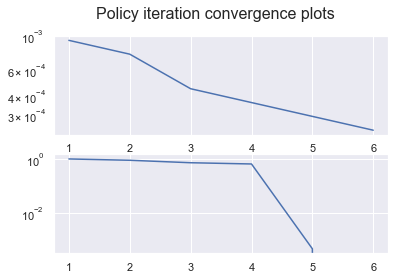

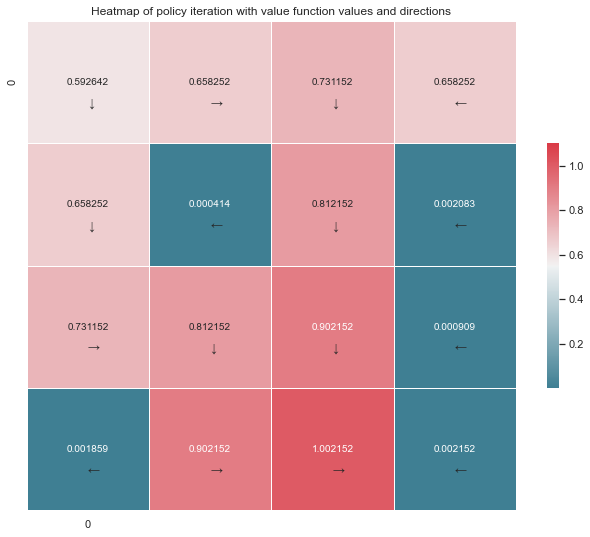

In [173]:
def policy_evaluation(env, gamma, policy, value_func_old, max_iterations=int(1e3), tol=1e-3):
    """
        Evaluate the value of a policy.
        See section 4.1 of Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) by Sutton and Barto
    """
    
    value_func_new = np.zeros(env.observation_space.n)
    value_func_collect = np.zeros((env.observation_space.n,max_iterations))

    for iteration in range(max_iterations):
        
        delta=0
        
        for s in range(env.observation_space.n):
            value_func_temp = 0
            a = policy[s]
            
            # Using env.P[s][a] implement the V(s) updation given in Figure 4.1
            # Note: Since this is a deterministic policy, the summation over
            # action space is not required.
            for next_state_from_tpm in env.P[s][a]:
                prob_action = next_state_from_tpm[0]
                cur_reward=next_state_from_tpm[2]
                future_reward=gamma*value_func_old[next_state_from_tpm[1]]
                value_func_temp+=prob_action*(cur_reward+future_reward)
            
            diff=abs(value_func_old[s]-value_func_temp)
            delta=max(delta,diff)
            
            value_func_new[s]=value_func_temp
        
        # Stopping criteria: STOP when the sup norm of (V_k-V_{k-1}) is less than some tolerance level(it's 1e-3 here).
        if delta<=tol: break
        
        value_func_old = value_func_new
        value_func_collect[:,iteration] = value_func_old

    return delta, value_func_new, iteration
def policy_improvement(env, gamma, value_func, policy):
    """
      Given a policy and value function, improve the policy.
      Returns true if policy is unchanged. Also returns the new policy.
      See section 4.2 of Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) by Sutton and Barto
    """
    value_func_new = np.zeros(env.observation_space.n)
    policy_stable=True
    for s in range(env.observation_space.n):
        old_action=policy[s]
        max_value_func=-1
        max_action=-1
        for a in range(env.action_space.n):
            value_func_temp=0
            # Copy and paste the "sum" which you've implemented in the 
            # policy_evaluation function here.
            for next_state_from_tpm in env.P[s][a]:
                prob_action = next_state_from_tpm[0]
                cur_reward = next_state_from_tpm[2]
                future_reward = gamma * value_func[next_state_from_tpm[1]]
                value_func_temp+=prob_action * (cur_reward + future_reward)
            
            if value_func_temp>max_value_func:
                max_value_func=value_func_temp
                max_action=a
        if max_action!=old_action: policy_stable=False
        policy[s]=max_action
        value_func_new[s]=max_value_func
    return policy_stable, policy, value_func_new
def policy_iteration(env, gamma, max_iterations=int(1e3), tol=1e-3):
    """
       Runs policy iteration.
       Returns optimal policy, value function, number of policy
       improvement iterations, and number of value iterations.
       See section 4.3 of Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) by Sutton and Barto
    """
    policy = np.random.randint(4, size=env.observation_space.n)
    value_func_old = np.random.rand(env.observation_space.n)
    value_func = np.zeros(env.observation_space.n)
    value_func_collect = np.zeros((env.observation_space.n,max_iterations))
    delta_collect = np.zeros(max_iterations)
    policy_stable=False
    iters=0
    eval_iters=0
    while not policy_stable:
        delta,value_func,iter=policy_evaluation(env,gamma,policy,value_func_old)
        delta_collect[iters] = delta
        value_func_collect[:,iters] = value_func
        eval_iters+=iter
        policy_stable,policy,value_func_old=policy_improvement(env,gamma,value_func,policy)
        iters+=1

    temp=np.repeat(value_func_collect[:,iters-1], iters, axis=0) 
    temp=temp.reshape(16,iters)
    temp1 = abs(value_func_collect[:,0:iters]-temp)
    distance_from_converged_value_func = temp1.max(axis=0)

    fig = plt.figure()
    fig.suptitle("Policy iteration convergence plots", fontsize=16)
    ax = plt.subplot(2,1,1)
    ax.plot(range(1,iters+1),delta_collect[0:iters])
    ax.set_yscale('log')


    ax = plt.subplot(2,1,2)
    ax.plot(range(1,iters+1),distance_from_converged_value_func)
    ax.set_yscale('log')

    print(policy, value_func, iters, eval_iters)
    return policy, value_func, iters, eval_iters
print("Doing Policy Iteration")
start_time=time.time()
policy, value_func, policy_iters, val_iters= policy_iteration(env,gamma)
print("Total time taken: "+str((time.time()-start_time)))
print("Total Policy Improvement Steps: "+str(policy_iters))
print("Total Policy Evaluation Steps: "+str(val_iters))
print("Policy:")
policy_str=print_policy(policy,action_names)

fancy_visual(value_func,policy_str)

## frozen lake x Q learning

In [77]:
from pathlib import Path
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map


sns.set_theme()

In [76]:
pip install gymnasium


  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1


In [88]:
class Params(NamedTuple):
    total_episodes: int  # Total episodes
    learning_rate: float  # Learning rate
    gamma: float  # Discounting rate
    epsilon: float  # Exploration probability
    map_size: int  # Number of tiles of one side of the squared environment
    seed: int  # Define a seed so that we get reproducible results
    is_slippery: bool  # If true the player will move in intended direction with probability of 1/3 else will move in either perpendicular direction with equal probability of 1/3 in both directions
    n_runs: int  # Number of runs
    action_size: int  # Number of possible actions
    state_size: int  # Number of possible states
    proba_frozen: float  # Probability that a tile is frozen
    #savefig_folder: Path  # Root folder where plots are saved


params = Params(
    total_episodes=2000,
    learning_rate=0.8,
    gamma=0.95,
    epsilon=0.1,
    map_size=5,
    seed=123,
    is_slippery=False,
    n_runs=20,
    action_size=None,
    state_size=None,
    proba_frozen=0.9,
    #savefig_folder=Path("../../_static/img/tutorials/"),
)
params

# Set the seed
rng = np.random.default_rng(params.seed)

In [79]:
env = gym.make(
    "FrozenLake-v1",
    is_slippery=params.is_slippery,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=params.map_size, p=params.proba_frozen, seed=params.seed
    ),
)

In [80]:
params = params._replace(action_size=env.action_space.n)
params = params._replace(state_size=env.observation_space.n)
print(f"Action size: {params.action_size}")
print(f"State size: {params.state_size}")


class Qlearning:
    def __init__(self, learning_rate, gamma, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.reset_qtable()

    def update(self, state, action, reward, new_state):
        """Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]"""
        delta = (
            reward
            + self.gamma * np.max(self.qtable[new_state, :])
            - self.qtable[state, action]
        )
        q_update = self.qtable[state, action] + self.learning_rate * delta
        return q_update

    def reset_qtable(self):
        """Reset the Q-table."""
        self.qtable = np.zeros((self.state_size, self.action_size))


class EpsilonGreedy:
    def __init__(self, epsilon):
        self.epsilon = epsilon

    def choose_action(self, action_space, state, qtable):
        """Choose an action `a` in the current world state (s)."""
        # First we randomize a number
        explor_exploit_tradeoff = rng.uniform(0, 1)
        # Exploration
        if explor_exploit_tradeoff < self.epsilon:
            action = action_space.sample()

        # Exploitation (taking the biggest Q-value for this state)
        else:
            # Break ties randomly
            # If all actions are the same for this state we choose a random one
            # (otherwise `np.argmax()` would always take the first one)
            if np.all(qtable[state, :]) == qtable[state, 0]:
                action = action_space.sample()
            else:
                action = np.argmax(qtable[state, :])
        return action

Action size: 4
State size: 25


In [81]:
learner = Qlearning(
    learning_rate=params.learning_rate,
    gamma=params.gamma,
    state_size=params.state_size,
    action_size=params.action_size,
)
explorer = EpsilonGreedy(
    epsilon=params.epsilon,
)

In [82]:
def run_env():
    rewards = np.zeros((params.total_episodes, params.n_runs))
    steps = np.zeros((params.total_episodes, params.n_runs))
    episodes = np.arange(params.total_episodes)
    qtables = np.zeros((params.n_runs, params.state_size, params.action_size))
    all_states = []
    all_actions = []

    for run in range(params.n_runs):  # Run several times to account for stochasticity
        learner.reset_qtable()  # Reset the Q-table between runs

        for episode in tqdm(
            episodes, desc=f"Run {run}/{params.n_runs} - Episodes", leave=False
        ):
            state = env.reset(seed=params.seed)[0]  # Reset the environment
            step = 0
            done = False
            total_rewards = 0

            while not done:
                action = explorer.choose_action(
                    action_space=env.action_space, state=state, qtable=learner.qtable
                )

                # Log all states and actions
                all_states.append(state)
                all_actions.append(action)

                # Take the action (a) and observe the outcome state(s') and reward (r)
                new_state, reward, terminated, truncated, info = env.step(action)

                done = terminated or truncated

                learner.qtable[state, action] = learner.update(
                    state, action, reward, new_state
                )

                total_rewards += reward
                step += 1
                # Our new state is state
                state = new_state

            # Log all rewards and steps
            rewards[episode, run] = total_rewards
            steps[episode, run] = step
        qtables[run, :, :] = learner.qtable

    return rewards, steps, episodes, qtables, all_states, all_actions

In [83]:
def postprocess(episodes, params, rewards, steps, map_size):
    """Convert the results of the simulation in dataframes."""
    res = pd.DataFrame(
        data={
            "Episodes": np.tile(episodes, reps=params.n_runs),
            "Rewards": rewards.flatten(),
            "Steps": steps.flatten(),
        }
    )
    res["cum_rewards"] = rewards.cumsum(axis=0).flatten(order="F")
    res["map_size"] = np.repeat(f"{map_size}x{map_size}", res.shape[0])

    st = pd.DataFrame(data={"Episodes": episodes, "Steps": steps.mean(axis=1)})
    st["map_size"] = np.repeat(f"{map_size}x{map_size}", st.shape[0])
    return res, st

In [84]:
def qtable_directions_map(qtable, map_size):
    """Get the best learned action & map it to arrows."""
    qtable_val_max = qtable.max(axis=1).reshape(map_size, map_size)
    qtable_best_action = np.argmax(qtable, axis=1).reshape(map_size, map_size)
    directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    qtable_directions = np.empty(qtable_best_action.flatten().shape, dtype=str)
    eps = np.finfo(float).eps  # Minimum float number on the machine
    for idx, val in enumerate(qtable_best_action.flatten()):
        if qtable_val_max.flatten()[idx] > eps:
            # Assign an arrow only if a minimal Q-value has been learned as best action
            # otherwise since 0 is a direction, it also gets mapped on the tiles where
            # it didn't actually learn anything
            qtable_directions[idx] = directions[val]
    qtable_directions = qtable_directions.reshape(map_size, map_size)
    return qtable_val_max, qtable_directions

In [90]:
def plot_q_values_map(qtable, env, map_size):
    """Plot the last frame of the simulation and the policy learned."""
    qtable_val_max, qtable_directions = qtable_directions_map(qtable, map_size)

    # Plot the last frame
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ax[0].imshow(env.render())
    ax[0].axis("off")
    ax[0].set_title("Last frame")

    # Plot the policy
    sns.heatmap(
        qtable_val_max,
        annot=qtable_directions,
        fmt="",
        ax=ax[1],
        cmap=sns.color_palette("Blues", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
        xticklabels=[],
        yticklabels=[],
        annot_kws={"fontsize": "xx-large"},
    ).set(title="Learned Q-values\nArrows represent best action")
    for _, spine in ax[1].spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.7)
        spine.set_color("black")
    img_title = f"frozenlake_q_values_{map_size}x{map_size}"
    plt.show()

In [86]:
def plot_states_actions_distribution(states, actions, map_size):
    """Plot the distributions of states and actions."""
    labels = {"LEFT": 0, "DOWN": 1, "RIGHT": 2, "UP": 3}

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    sns.histplot(data=states, ax=ax[0], kde=True)
    ax[0].set_title("States")
    sns.histplot(data=actions, ax=ax[1])
    ax[1].set_xticks(list(labels.values()), labels=labels.keys())
    ax[1].set_title("Actions")
    fig.tight_layout()
    img_title = f"frozenlake_states_actions_distrib_{map_size}x{map_size}.png"
    plt.show()

Map size: 4x4


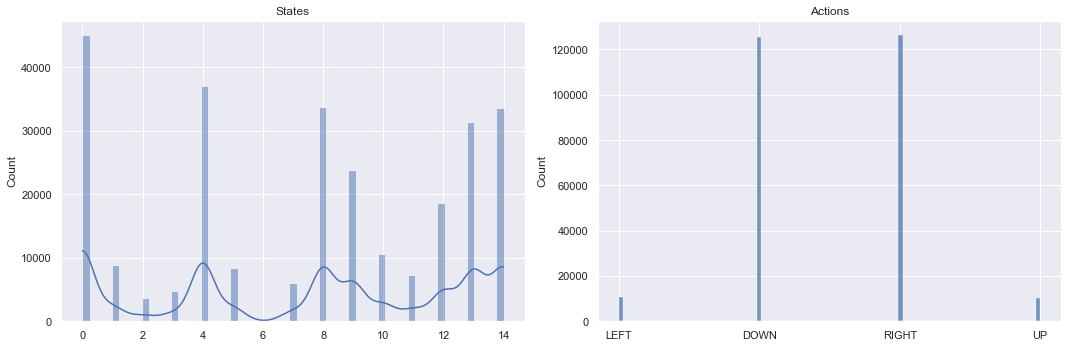

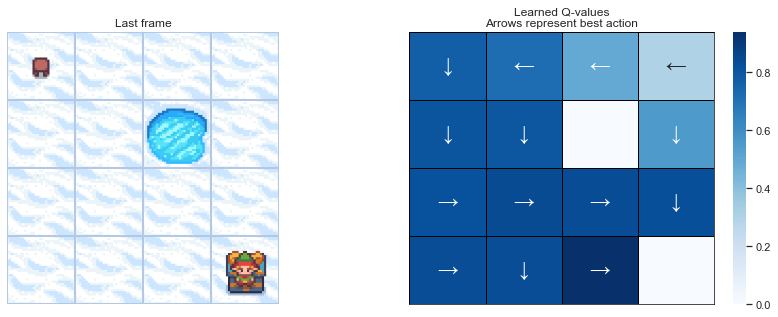

Map size: 7x7


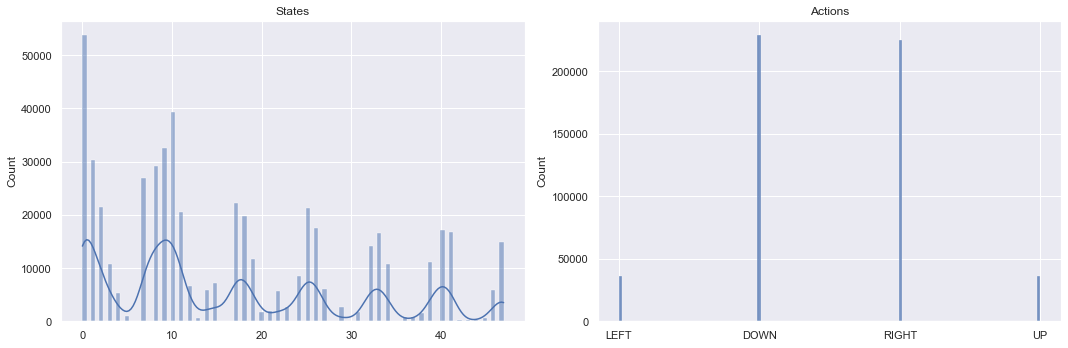

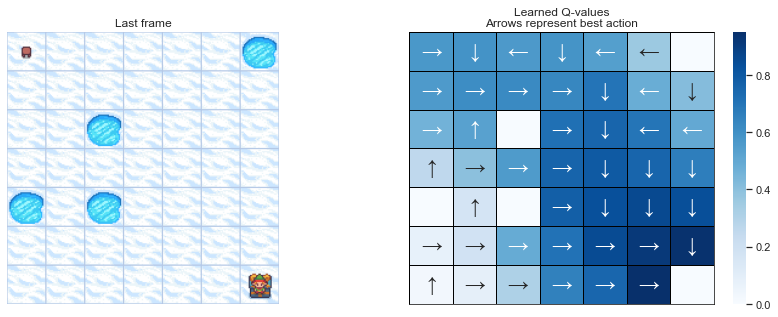

Map size: 9x9


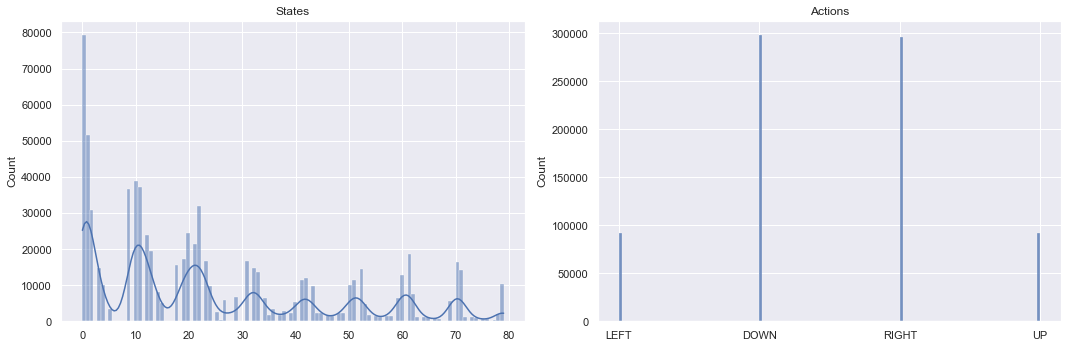

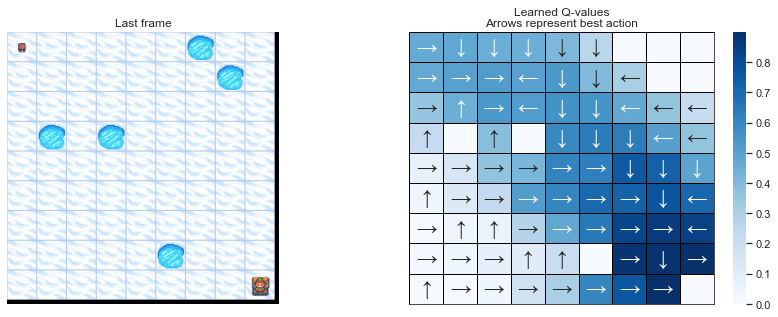

Map size: 11x11


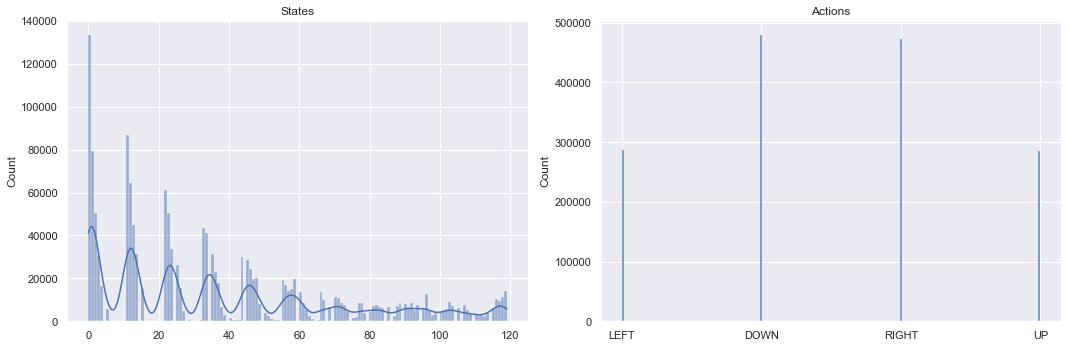

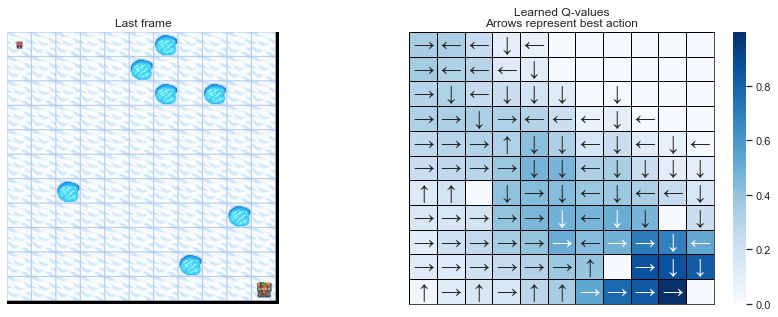

In [91]:
map_sizes = [4, 7, 9, 11]
res_all = pd.DataFrame()
st_all = pd.DataFrame()

for map_size in map_sizes:
    env = gym.make(
        "FrozenLake-v1",
        is_slippery=params.is_slippery,
        render_mode="rgb_array",
        desc=generate_random_map(
            size=map_size, p=params.proba_frozen, seed=params.seed
        ),
    )

    params = params._replace(action_size=env.action_space.n)
    params = params._replace(state_size=env.observation_space.n)
    env.action_space.seed(
        params.seed
    )  # Set the seed to get reproducible results when sampling the action space
    learner = Qlearning(
        learning_rate=params.learning_rate,
        gamma=params.gamma,
        state_size=params.state_size,
        action_size=params.action_size,
    )
    explorer = EpsilonGreedy(
        epsilon=params.epsilon,
    )

    print(f"Map size: {map_size}x{map_size}")
    rewards, steps, episodes, qtables, all_states, all_actions = run_env()
    # Save the results in dataframes
    res, st = postprocess(episodes, params, rewards, steps, map_size)
    res_all = pd.concat([res_all, res])
    st_all = pd.concat([st_all, st])
    qtable = qtables.mean(axis=0)  # Average the Q-table between runs

    plot_states_actions_distribution(
        states=all_states, actions=all_actions, map_size=map_size
    )  # Sanity check
    plot_q_values_map(qtable, env, map_size)

    env.close()

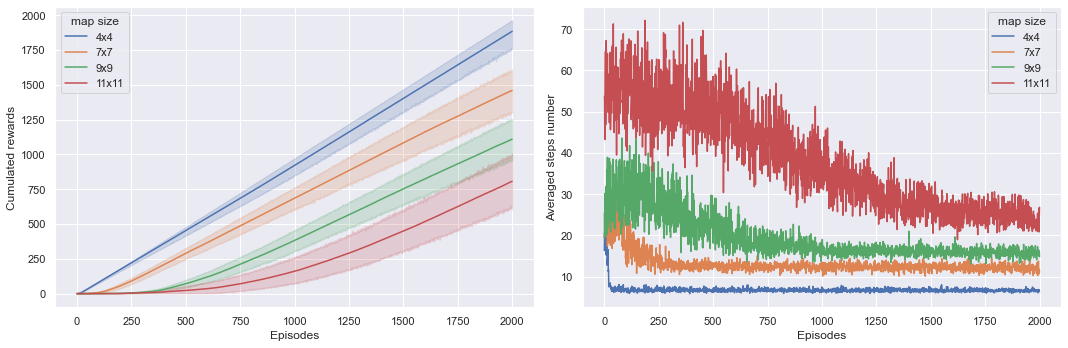

In [114]:
def plot_steps_and_rewards(rewards_df, steps_df):
    """Plot the steps and rewards from dataframes."""
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    rewards_df = rewards_df.reset_index()
    steps_df = steps_df.reset_index()
    sns.lineplot(
        data=rewards_df, x="Episodes", y="cum_rewards", hue="map_size", ax=ax[0]
    )
    ax[0].set(ylabel="Cumulated rewards")

    sns.lineplot(data=steps_df, x="Episodes", y="Steps", hue="map_size", ax=ax[1])
    ax[1].set(ylabel="Averaged steps number")

    for axi in ax:
        axi.legend(title="map size")
    fig.tight_layout()

    plt.show()


plot_steps_and_rewards(res_all, st_all)